In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Ecuación de Laplace

La ecuación de Laplace es

$$\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} =0$$

Esta ecuación diferencial es indepensiente del tiempo por lo tanto al momento de discretizar la ecuación no se buscará encontrar el siguiente paso en el tiempo como en el caso de las ecuaciones de transporte. Sin embargo podremos obtener una condición de equilibrio para cada punto dadas las condiciones de frontera.

La disctretización de la ecuacíon sería

$$\frac{p_{(i+1,j)}+p_{(i-1,j)}-2p_{(i,j)}}{(\Delta x)^2}+\frac{p_{(i,j+1)}+p_{(i,j-1)}-2p_{(i,j)}}{(\Delta y)^2}=0$$

Por lo tanto la condición de equilibrio es

$$p_{(i,j)} = \frac{(\Delta y)^2\left(p_{(i+1,j)}+p_{(i-1,j)}\right)+(\Delta x)^2\left(p_{(i,j+1)}+p_{(i,j-1)}\right)}{2((\Delta x)^2 + (\Delta y)^2)}$$

Para resolver esta ecuación de forma numérica hay varias formas, imponer las condiciones en la frontera y tratar a la malla como un vector, $\vec{x_0}$, y definir el operador Laplaciano, como en la condición de equilibrio, como una matriz, $M$. Por lo tanto tenemos que resolver el problema $$\vec{x_0} = M \vec{x_f}$$ 
Donde $\vec{x_f}$ es la representación vectorial de la función que resuelve la ecuación de Laplace con las condiciones de frontera dadas. Por lo tanto resolver la ecuación de Laplace se puede resumir en resulver $$\vec{x_f} = M^{-1}\vec{x_0}$$

Otra forma de resolver el problema de Laplace de forma numérica es tratando la malla como una matriz, aplicar las condiciones, y aplicar recursivamente la relación de estabilidad. La solución del problema se obtiene una vez que el método recursivo ha convergido. A continuación trataremos de resolver el problema de Laplace usando éste método.

In [1]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Definimos una función que grafica una función de dos variables, para simplificar la notación del notebook.

In [38]:
def plot2D(x, y, p, p_lap, title1, title2, ang):
    fig = figure(figsize=(16,8), dpi=100)
    ax = fig.add_subplot(121,projection='3d')
    bx = fig.add_subplot(122,projection='3d')
    
    X,Y = meshgrid(x,y)
    ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.coolwarm,
            linewidth=0, antialiased=False)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title(title1)
    ax.view_init(30,225)
    
    bx.plot_surface(X, Y, p_lap[:], rstride=1, cstride=1, cmap=cm.coolwarm,
            linewidth=0, antialiased=False)
    bx.set_xlim(0,1)
    bx.set_ylim(0,1)
    bx.set_title(title2)
    bx.view_init(20,ang)

Definimos la función que realiza el proceso recursivo.

Recordemos que la condición de equilibrio es

$$p_{(i,j)} = \frac{(\Delta y)^2\left(p_{(i+1,j)}+p_{(i-1,j)}\right)+(\Delta x)^2\left(p_{(i,j+1)}+p_{(i,j-1)}\right)}{2((\Delta x)^2 + (\Delta y)^2)}$$

In [16]:
def laplace_rec(p0, x, y, dx, dy, epsilon, cond_frontera):
    epsilon_temp = 1.
    p = p0.copy()
    pn = empty_like(p0)
    
    while epsilon_temp > epsilon:
        pn = p.copy()
        #Se aplica la condicion de estabilidad en el interior del dominio
        p[1:-1,1:-1] = ( dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1]) + dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2])  )/(2*(dx**2+dy**2))
        
        #Se aplican las condiciones de frontera
        p = cond_frontera(p, x, y)
        
        #Se calcula la distancia entre la nueva y la vieja funcion para ver la convergencia del metodo
        
        epsilon_temp = sum(abs(p[:])-abs(pn[:]))/sum(abs(pn[:]))
    return pn

Resolvamos la ecuación de Laplace en $(0,1)\times(0,1)$ con las siguientes condiciones de frontera:

$$
p(x, 0) = x^2 \\
p(x, 1) = 3x \\
\frac{\partial p}{\partial x}(0,y) = 0 \\
\frac{\partial p}{\partial x}(1,y) = 0 
$$

Utilizando separación de variables, suponiendo que $p(x,y)=X(x)Y(y)$ obtenemos
$$\frac{X''}{X}=-\frac{Y''}{Y} = \lambda$$
Con las condiciones periodicas sobre $X(x)$
$$
X'(0)=0\\
X'(1)=0
$$
Entonces $\lambda=-k^2$

Por lo tanto resolviendo para $X(x)$ tenemos $$X''(x)+k^2 X(x)=0$$
Por lo tanto $$X(x)=A\cos kx + B\sin kx$$
Aplicando las condiciones de frontera tenemos que $B=0$ y $k=\frac{(2n+1) π}{2}$

De donde $$X_n(x)=A_n \cos  \frac{(2n+1) π}{2} x $$

Resolviendo para $Y(y)$ tenemos
$$Y_n''(y)-k_n^2 Y_n(y)=0$$
De donde $$Y_n(y)=A_n\cosh k_ny + B_n\sinh k_ny$$

Por lo tanto la solución general es una combinación lineal de todas las n

$$p(x,y) = \frac{B_0}{2} +\sum_{n=1}^{\infty}  (A_n\cosh k_ny + B_n\sinh k_ny) \cos k_n x$$
Donde $k_n=\frac{(2n+1) π}{2}$

Aplicando las condiciones de frontera en $x=0$ y $x=1$ llegamos a que $A_n = 2 \int_0^1 x^2 \cos ( \frac{(2n+1) π}{2} x ) dx$ y $B_n = ...$


Por lo tanto llegamos a 
$$p(x,y) = ...$$

Resolvamos la ecuación de Laplace en $(0,1)\times(0,1)$ con las siguientes condiciones de frontera:

$$
p(x, 0) = x^2 \\
p(x, 1) = 3x \\
\frac{\partial p}{\partial x}(0,y) = 0 \\
\frac{\partial p}{\partial x}(1,y) = 0 
$$

In [12]:
def cond_front(p, x, y):
    
    p[:, 0] = x**2
    p[:, -1] = 3*x    
    p[0,:] = p[1,:]
    p[-1,:] = p[-2,:]
    
    return p

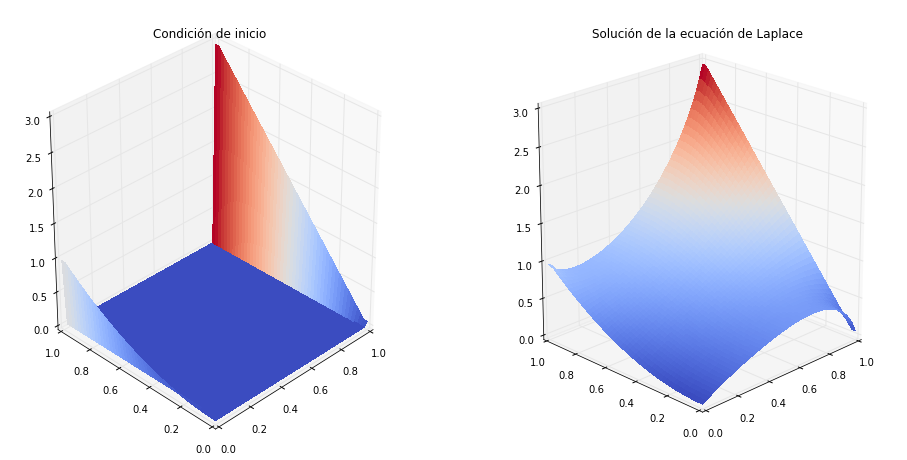

In [39]:
nx = 51
ny = 51
dx = 1./(nx-1)
dy = 1./(ny-1)

x = linspace(0, 1, nx)
y = linspace(0, 1, ny)

#Se define un arreglo de puros ceros
p0 = zeros((nx, ny))

#Se imponen las condiciones de frontera
p0 = cond_front(p0, x, y)

#Se calcula la solucion de la ecuacion de laplace
Psol = laplace_rec(p0, x, y, dx, dy, 1.0e-4, cond_front)
plot2D(x, y, p0, Psol, u'Condición de inicio', u'Solución de la ecuación de Laplace',225)

Mostremos a continuación el efecto que tiene el factor epsilon

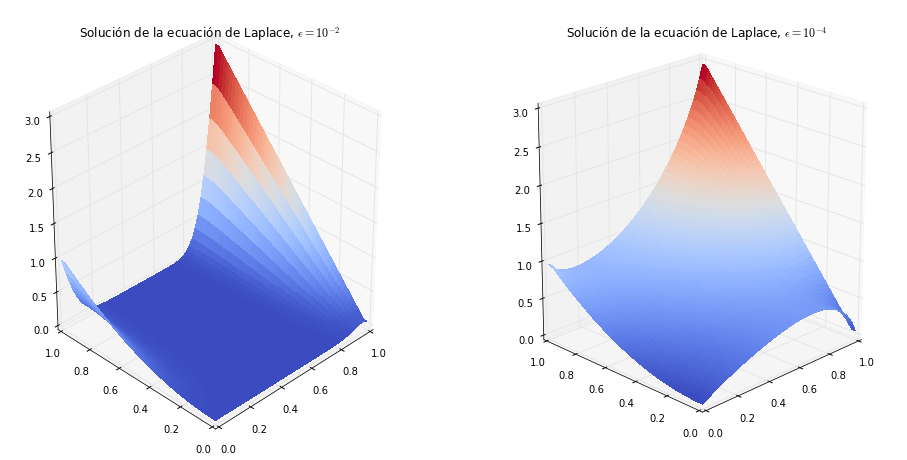

In [40]:
nx = 51
ny = 51
dx = 1./(nx-1)
dy = 1./(ny-1)

x = linspace(0, 1, nx)
y = linspace(0, 1, ny)

#Se define un arreglo de puros ceros
p0 = zeros((nx, ny))

#Se imponen las condiciones de frontera
p0 = cond_front(p0, x, y)

#Se calcula la solucion de la ecuacion de laplace
Psol = laplace_rec(p0, x, y, dx, dy, 1.0e-2, cond_front)
Psol2 = laplace_rec(p0, x, y, dx, dy, 1.0e-4, cond_front)

plot2D(x, y, Psol, Psol2, u'Solución de la ecuación de Laplace, $\epsilon= 10^{-2}$', 
       u'Solución de la ecuación de Laplace, $\epsilon= 10^{-4}$')

Ahora resolvamos la ecuación de Laplace en $(0,1)\times(0,1)$ con las siguientes condiciones de frontera:

$$
p(x, 0) = sin(2\pi x) \\
p(x, 1) = cos(2\pi x) \\
\frac{\partial p}{\partial x}(0,y) = 0 \\
\frac{\partial p}{\partial x}(1,y) = 0 
$$

In [36]:
def cond_front2(p, x, y):
    
    p[:, 0] = sin(2*pi*x)
    p[:, -1] = cos(2*pi*x)
    p[0,:] = p[1,:]
    p[-1,:] = p[-2,:]
    
    return p

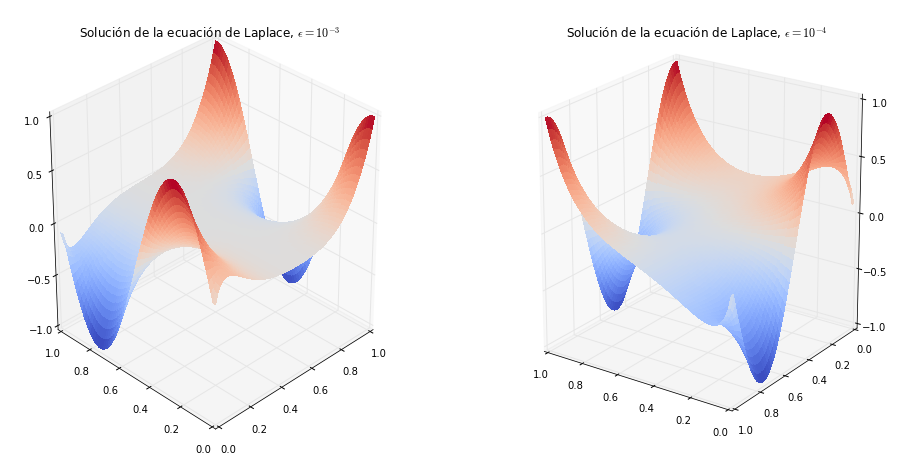

In [49]:
nx = 71
ny = 71
dx = 1./(nx-1)
dy = 1./(ny-1)

x = linspace(0, 1, nx)
y = linspace(0, 1, ny)

#Se define un arreglo de puros ceros
p0 = zeros((nx, ny))

#Se imponen las condiciones de frontera
p0 = cond_front2(p0, x, y)

#Se calcula la solucion de la ecuacion de laplace
Psol = laplace_rec(p0, x, y, dx, dy, 1.0e-3, cond_front2)
Psol2 = laplace_rec(p0, x, y, dx, dy, 1.0e-4, cond_front2)

plot2D(x, y, Psol, Psol2, u'Solución de la ecuación de Laplace, $\epsilon= 10^{-3}$', 
       u'Solución de la ecuación de Laplace, $\epsilon= 10^{-4}$', 125)